In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv(r'E:\TCR internship\classcode\dataset\income_evaluation.csv')

In [4]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
dataset.shape

(32561, 15)

In [6]:
dataset.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [7]:
def initial_eda(dataset):
    if isinstance(dataset, pd.DataFrame):
        total_na = dataset.isna().sum().sum()
        print("total records", dataset.shape)
        print("total number of NA:",total_na)
        cols_name = dataset.columns
        dtype=dataset.dtypes
        duniq = dataset.nunique()
        na_val = dataset.isna().sum()
        for i in range(len(dataset.columns)):
            print("%38s %10s %10s %10s"%(cols_name[i], dtype[i], duniq[i], na_val[i]))
        else:
            print("error in the code")

In [8]:
initial_eda(dataset)

total records (32561, 15)
total number of NA: 0
                                   age      int64         73          0
                             workclass     object          9          0
                                fnlwgt      int64      21648          0
                             education     object         16          0
                         education-num      int64         16          0
                        marital-status     object          7          0
                            occupation     object         15          0
                          relationship     object          6          0
                                  race     object          5          0
                                   sex     object          2          0
                          capital-gain      int64        119          0
                          capital-loss      int64         92          0
                        hours-per-week      int64         94          0
                

In [9]:
categorical =  [var for var in dataset.columns if dataset[var].dtype == 'O']
print("All categorical dataset are :", categorical)

All categorical dataset are : [' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country', ' income']


In [10]:
dataset[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


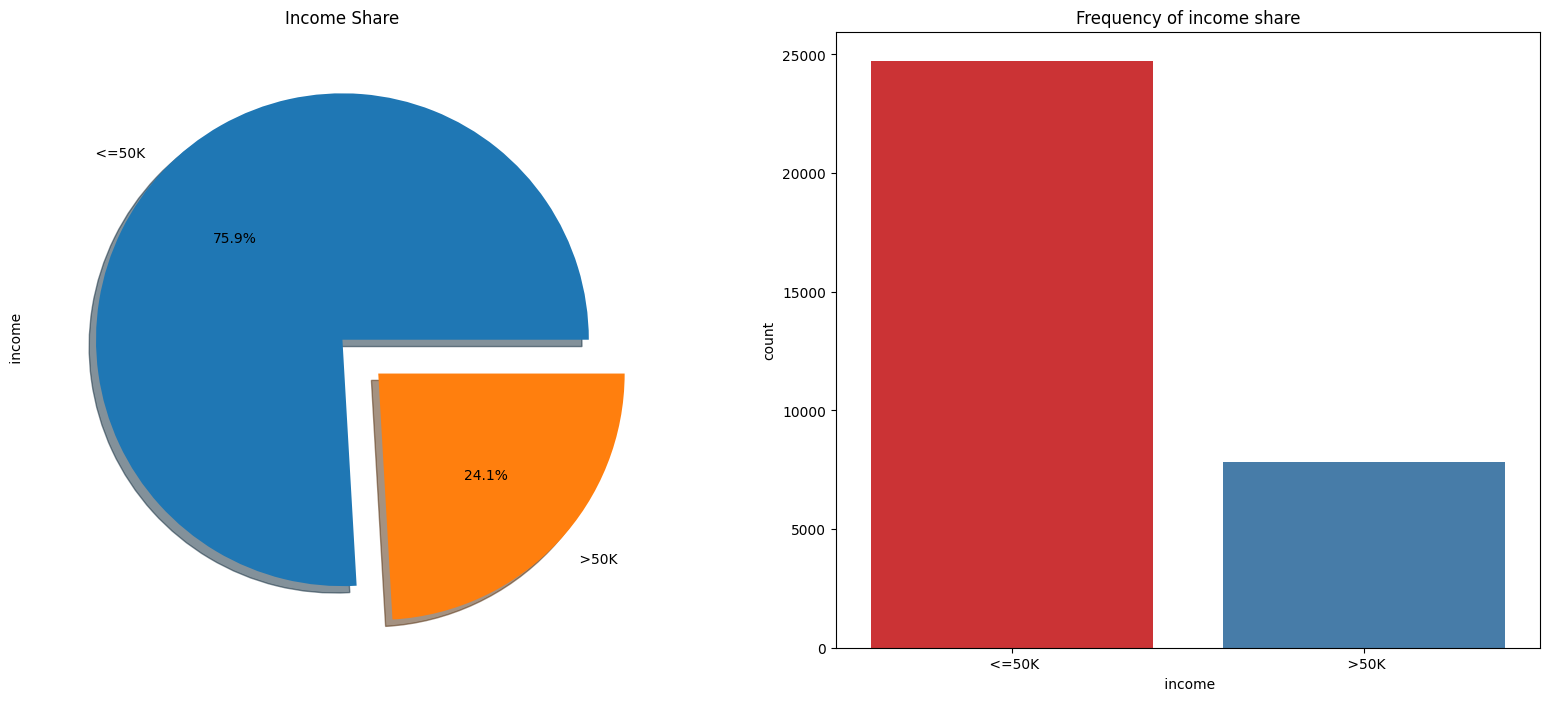

In [11]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0] = dataset[' income'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Income Share")
ax[1] = sns.countplot(x=" income", data=dataset, palette="Set1")
ax[1].set_title('Frequency of income share')
plt.show()

In [12]:
for var in categorical:
    print(dataset[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-manager

In [13]:
dataset[' workclass'].replace(' ?', np.NaN, inplace=True)
dataset[' occupation'].replace(' ?', np.NaN, inplace=True)
dataset[' native-country'].replace (' ?', np.NaN, inplace=True)

In [14]:
x = dataset.drop([' income'], axis=1)
y = dataset[' income']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [16]:
print(X_train.shape, X_test.shape)

(26048, 14) (6513, 14)


In [17]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
dataset.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [21]:
import category_encoders as ce

In [22]:
encoder = ce.OrdinalEncoder(cols=[' workclass',' education',
                                   ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country'] )

In [23]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [24]:
X_train[0:10]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
14419,31,1,247444,1,11,1,1,1,1,1,0,0,40,1
11366,37,2,34996,2,9,2,2,2,1,2,0,0,40,2
4937,18,1,194059,3,8,3,3,3,1,1,0,0,40,2
22944,38,1,224566,1,11,1,4,1,1,1,0,0,50,2
6729,30,1,363296,2,9,3,4,2,2,1,0,0,72,2
25044,18,9,126154,4,10,3,15,3,1,1,0,0,40,2
18528,53,1,281425,2,9,1,5,1,1,1,0,0,40,2
15621,41,1,208470,2,9,1,6,1,1,1,0,0,40,2
21533,50,2,161075,2,9,4,7,2,2,2,0,0,40,2
14301,33,1,104509,2,9,5,3,3,1,2,0,0,40,2


In [25]:
cols = X_train.columns

In [26]:
cols

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country'],
      dtype='object')

In [27]:
from sklearn.preprocessing import RobustScaler

In [28]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train[0:5])
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

[[-0.3         0.          0.57758363 -0.75        0.33333333 -1.
  -0.83333333 -0.33333333  0.          0.          0.          0.
   0.         -1.        ]
 [ 0.          0.5        -1.20115793 -0.5        -0.33333333 -0.5
  -0.66666667  0.          0.          1.          0.          0.
   0.          0.        ]
 [-0.95        0.          0.13061252 -0.25       -0.66666667  0.
  -0.5         0.33333333  0.          0.          0.          0.
   0.          0.        ]
 [ 0.05        0.          0.38603534 -0.75        0.33333333 -1.
  -0.33333333 -0.33333333  0.          0.          0.          0.
   2.          0.        ]
 [-0.35        0.          1.54756577 -0.5        -0.33333333  0.
  -0.33333333  0.          1.          0.          0.          0.
   6.4         0.        ]]


In [29]:
X_train.columns

MultiIndex([(            'age',),
            (     ' workclass',),
            (        ' fnlwgt',),
            (     ' education',),
            ( ' education-num',),
            (' marital-status',),
            (    ' occupation',),
            (  ' relationship',),
            (          ' race',),
            (           ' sex',),
            (  ' capital-gain',),
            (  ' capital-loss',),
            (' hours-per-week',),
            (' native-country',)],
           )

In [30]:
X_train.shape

(26048, 14)

In [31]:
X_train[0:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.30,0.0,0.577584,-0.75,0.333333,-1.0,-0.833333,-0.333333,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.00,0.5,-1.201158,-0.50,-0.333333,-0.5,-0.666667,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.95,0.0,0.130613,-0.25,-0.666667,0.0,-0.500000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0
3,0.05,0.0,0.386035,-0.75,0.333333,-1.0,-0.333333,-0.333333,0.0,0.0,0.0,0.0,2.0,0.0
4,-0.35,0.0,1.547566,-0.50,-0.333333,0.0,-0.333333,0.000000,1.0,0.0,0.0,0.0,6.4,0.0


In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, random_state=0)
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test, y_pred)
print("Random Forest Model :", round(np.abs(score)*100, 2))

Random Forest Model : 79.07


In [34]:
feature_score = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_score)

 fnlwgt            0.164661
age                0.150021
 capital-gain      0.111540
 marital-status    0.097617
 education-num     0.084467
 hours-per-week    0.083481
 occupation        0.080601
 relationship      0.075178
 workclass         0.037278
 education         0.036012
 capital-loss      0.034628
 native-country    0.016768
 race              0.014618
 sex               0.013133
dtype: float64


In [35]:
X_train.columns = X_train.columns.get_level_values(0)
X_test.columns = X_test.columns.get_level_values(0)

In [36]:
X_test.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country'],
      dtype='object')

In [37]:
X_train_do = X_train.drop([' education', ' race', ' sex', ' native-country',' capital-loss'], axis=1)
X_test_do = X_test.drop([' education', ' race', ' sex', ' native-country',' capital-loss'], axis=1)

In [38]:
rfc = RandomForestClassifier(n_estimators = 100, random_state=0)
rfc.fit(X_train_do, Y_train)
y_pred = rfc.predict(X_test_do)
score=accuracy_score(Y_test, y_pred)
print("Random Forest Model :", round(np.abs(score)*100, 2))

Random Forest Model : 78.18


In [39]:
feature_score = pd.Series(rfc.feature_importances_, index=X_train_do.columns).sort_values(ascending=False)
print(feature_score)

 fnlwgt            0.199114
age                0.156032
 education-num     0.124920
 marital-status    0.120928
 capital-gain      0.111459
 hours-per-week    0.085916
 relationship      0.081065
 occupation        0.080980
 workclass         0.039586
dtype: float64


In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.79      0.97      0.87      4928
        >50K       0.68      0.20      0.31      1585

    accuracy                           0.78      6513
   macro avg       0.73      0.58      0.59      6513
weighted avg       0.76      0.78      0.73      6513

